# ARIMA MODEL

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [5]:
# df = pd.read_csv('C:/Users/GAME/covid19-in-india/date_wise_data.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# df = df.drop(df.index[-1])
df1 = df1.set_index('Country/Region')
df2 = df2.set_index('Country/Region')
df3 = df3.set_index('Country/Region')

india1 = df1.loc['India']
india1 = india1.astype('float64')
india1 = india1.drop(['Lat','Long'])
india2 = df2.loc['India']
india2 = india2.astype('float64')
india2 = india2.drop(['Lat','Long'])
india3 = df3.loc['India']
india3 = india3.astype('float64')
india3 = india3.drop(['Lat','Long'])

# india2

In [55]:
india_df = pd.DataFrame(india1)
india_df = india_df.drop(['Province/State'])
india_df.insert(1, 'rec', india2)
india_df.insert(2, 'deaths', india3)
india_df.insert(3, 'Active', india1-india2-india3)
india_df = india_df.reset_index().rename(columns = {'index':'Date', 'India':'Confirmed', 'rec':'Cured', 'deaths':'Deaths'})#.set_index('Date')
df = india_df.copy()
df

,Date,Confirmed,Cured,Deaths,Active
0,1/22/20,0.0,0.0,0.0,0.0
1,1/23/20,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0
...,...,...,...,...,...
105,5/6/20,52987.0,15331.0,1785.0,35871.0
106,5/7/20,56351.0,16776.0,1889.0,37686.0
107,5/8/20,59695.0,17887.0,1985.0,39823.0
108,5/9/20,62808.0,19301.0,2101.0,41406.0


In [56]:
# df = df.drop(['Unnamed: 0'] , axis  = 1)
# df['Date'] = df['Date'].drop(['2020-04-15'])
# df = df['Date'].drop('2020-04-15', axis = 0)
df = df.dropna()
# df['Date'] = df['Date'].astype(float)
# df = df.set_index('Date')
df.Date = pd.to_datetime(df.Date)#.to_period('D')
df = df.set_index('Date')
df = df.astype('float64')
# df = df.drop(df.loc['2020-04-15'])
df

,Confirmed,Cured,Deaths,Active
Date,,,,
2020-01-22,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-05-06,52987.0,15331.0,1785.0,35871.0
2020-05-07,56351.0,16776.0,1889.0,37686.0
2020-05-08,59695.0,17887.0,1985.0,39823.0


In [57]:
active = df['Active']
active

Date
2020-01-22        0.0
2020-01-23        0.0
2020-01-24        0.0
2020-01-25        0.0
2020-01-26        0.0
               ...   
2020-05-06    35871.0
2020-05-07    37686.0
2020-05-08    39823.0
2020-05-09    41406.0
2020-05-10    43980.0
Name: Active, Length: 110, dtype: float64

In [58]:
deaths = df['Deaths']
deaths

Date
2020-01-22       0.0
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
               ...  
2020-05-06    1785.0
2020-05-07    1889.0
2020-05-08    1985.0
2020-05-09    2101.0
2020-05-10    2212.0
Name: Deaths, Length: 110, dtype: float64

<IPython.core.display.Javascript object>


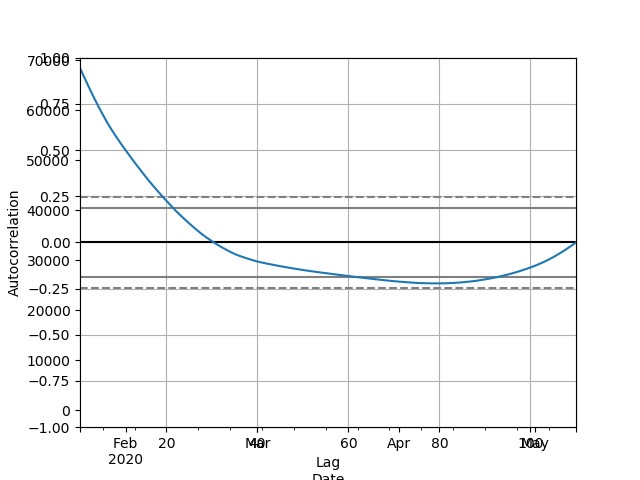

In [59]:
%matplotlib notebook
df.plot()
pyplot.show()

In [60]:
df.kurtosis()

Confirmed    3.341367
Cured        5.553401
Deaths       3.509869
Active       2.458145
dtype: float64

In [61]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(active)
pyplot.show()

D:\anaconda\new_anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


                             ARIMA Model Results                              
Dep. Variable:               D.Active   No. Observations:                  109
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -856.383
Method:                           css   S.D. of innovations            625.021
Date:                Mon, 11 May 2020   AIC                           1716.766
Time:                        22:51:52   BIC                           1722.148
Sample:                    01-23-2020   HQIC                          1718.949
                         - 05-10-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        403.4862     59.866      6.740      0.000     286.151     520.822
                             ARIMA Model Results                              
Dep. Variable:               D.Deaths   No. Observat

D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<IPython.core.display.Javascript object>


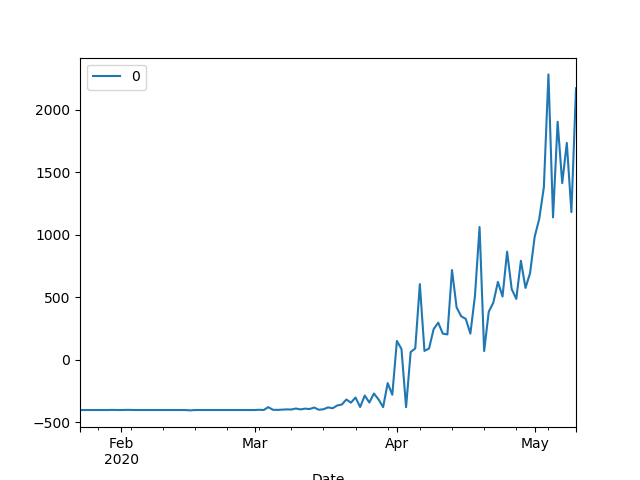

<IPython.core.display.Javascript object>


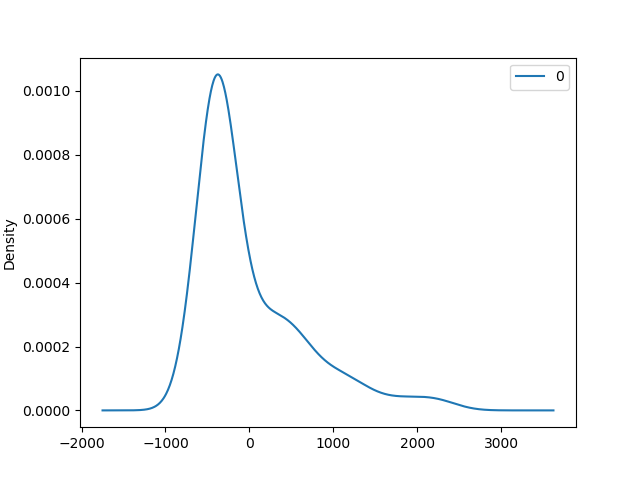

                  0
count  1.090000e+02
mean  -1.668798e-13
std    6.279077e+02
min   -4.064862e+02
25%   -4.034862e+02
50%   -3.824862e+02
75%    2.955138e+02
max    2.281514e+03


In [62]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(active, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

model_d = ARIMA(deaths, order=(0,1,0))
model_d_fit = model_d.fit(disp=0)
print(model_d_fit.summary())


residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [63]:
from sklearn.metrics import mean_squared_error
X = active
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

predicted=2774.971429, expected=2303.000000
predicted=2326.323944, expected=2767.000000
predicted=3237.444444, expected=3260.000000
predicted=3759.753425, expected=4267.000000
predicted=5287.608108, expected=4740.000000
predicted=5219.306667, expected=5232.000000
predicted=5730.473684, expected=5879.000000
predicted=6534.402597, expected=6578.000000
predicted=7285.961538, expected=7189.000000
predicted=7807.734177, expected=7794.000000
predicted=8406.562500, expected=8914.000000
predicted=10047.827160, expected=9735.000000
predicted=10566.012195, expected=10485.000000
predicted=11244.036145, expected=11214.000000
predicted=11951.678571, expected=11825.000000
predicted=12443.188235, expected=12738.000000
predicted=13661.616279, expected=14202.000000
predicted=15682.827586, expected=14674.000000
predicted=15151.363636, expected=15460.000000
predicted=16254.831461, expected=16319.000000
predicted=17187.544444, expected=17344.000000
predicted=18380.263736, expected=18252.000000
predicted=1

In [64]:
from sklearn.metrics import mean_squared_error
X_d = deaths
size = int(len(X_d) * 0.66)
train, test = X_d[0:size], X_d[size:len(X_d)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error_d = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=86.200000, expected=72.000000
predicted=72.000000, expected=86.000000
predicted=100.194444, expected=99.000000
predicted=112.178082, expected=136.000000
predicted=173.500000, expected=150.000000
predicted=164.186667, expected=178.000000
predicted=206.368421, expected=226.000000
predicted=274.623377, expected=246.000000
predicted=266.256410, expected=288.000000
predicted=330.531646, expected=331.000000
predicted=374.537500, expected=358.000000
predicted=385.333333, expected=393.000000
predicted=428.426829, expected=405.000000
predicted=417.144578, expected=448.000000
predicted=491.511905, expected=486.000000
predicted=524.447059, expected=521.000000
predicted=556.406977, expected=559.000000
predicted=597.436782, expected=592.000000
predicted=625.375000, expected=645.000000
predicted=698.595506, expected=681.000000
predicted=717.400000, expected=721.000000
predicted=761.439560, expected=780.000000
predicted=839.641304, expected=825.000000
predicted=870.483871, expected=881.0000

In [65]:
error_active = np.sqrt(error)
error_active

453.3517192085133

In [66]:
error_deaths = np.sqrt(error_d)
error_deaths

25.416150136190414

In [67]:
# pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(X, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1470.732, BIC=1481.460, Time=0.175 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1521.395, BIC=1526.759, Time=0.010 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1475.849, BIC=1483.895, Time=0.046 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1474.831, BIC=1482.877, Time=0.129 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=1520.221, BIC=1522.903, Time=0.008 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1472.545, BIC=1485.956, Time=0.546 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1469.600, BIC=1483.010, Time=0.254 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1471.467, BIC=1482.195, Time=0.200 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1471.504, BIC=1487.597, Time=0.376 seconds
Fit ARIMA: (1, 2, 3)x(0, 0, 0, 0) (constant=True); AIC=1471.431, BIC=1487.

In [68]:
import pmdarima as pm
model = pm.auto_arima(X_d, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=855.837, BIC=866.565, Time=0.098 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=898.207, BIC=903.571, Time=0.012 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=865.362, BIC=873.408, Time=0.062 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=855.645, BIC=863.691, Time=0.120 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=896.700, BIC=899.382, Time=0.014 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=855.673, BIC=866.402, Time=0.127 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=859.585, BIC=872.996, Time=0.204 seconds
Total fit time: 0.652 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -424.822
Date:            

In [69]:
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load dataset
series = active.copy()
series_deaths = deaths.copy()
# seasonal difference
X = series.values
X_d = series_deaths.values
days_in_year = 365
differenced = difference(X)
differenced_d = difference(X_d)
# fit model
model = ARIMA(differenced, order=(0,1,1))
model_fit = model.fit(disp=0)

model_d = ARIMA(differenced_d, order=(0,1,1))
model_d_fit = model_d.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=10)[0]
forecast_d = model_d_fit.forecast(steps=10)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
history_d = [x for x in X_d]
day = 1
day_d = 1
prediction = list()
print("Forecast for Active Cases:")
for yhat in forecast:
    inverted = inverse_difference(history, yhat)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1
    
print('\n\n\n')
    
print("Forecast for No. of Deaths:")    
for yhat in forecast_d:
    inverted_d = inverse_difference(history_d, yhat)
    print('Day %d: %f' % (day_d, inverted_d))
    history_d.append(inverted_d)
    day_d += 1

Forecast for Active Cases:
Day 1: 46143.521005
Day 2: 48327.220710
Day 3: 50531.099114
Day 4: 52755.156217
Day 5: 54999.392020
Day 6: 57263.806522
Day 7: 59548.399723
Day 8: 61853.171623
Day 9: 64178.122223
Day 10: 66523.251522




Forecast for No. of Deaths:
Day 1: 2323.689628
Day 2: 2436.420236
Day 3: 2550.191824
Day 4: 2665.004391
Day 5: 2780.857937
Day 6: 2897.752463
Day 7: 3015.687968
Day 8: 3134.664453
Day 9: 3254.681918
Day 10: 3375.740362


# SARIMAX MODEL

In [17]:
# df = df.reset_index()
# df.Date = pd.DatetimeIndex(df.Date).to_period('D')
# df = df.set_index('Date')

In [70]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(active,
                                order=(0,2,3),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7012      0.079     -8.841      0.000      -0.857      -0.546
ma.L2          0.2265      0.102      2.219      0.026       0.026       0.426
ma.L3         -0.2171      0.084     -2.570      0.010      -0.383      -0.052
ar.S.L12      -0.5755      0.141     -4.072      0.000      -0.853      -0.299
sigma2      6.108e+04   6372.760      9.584      0.000    4.86e+04    7.36e+04


In [71]:
import statsmodels.api as sm
mod_d = sm.tsa.statespace.SARIMAX(deaths,
                                order=(0,2,1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_d = mod_d.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7012      0.079     -8.841      0.000      -0.857      -0.546
ma.L2          0.2265      0.102      2.219      0.026       0.026       0.426
ma.L3         -0.2171      0.084     -2.570      0.010      -0.383      -0.052
ar.S.L12      -0.5755      0.141     -4.072      0.000      -0.853      -0.299
sigma2      6.108e+04   6372.760      9.584      0.000    4.86e+04    7.36e+04


D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\new_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [72]:

active.index = pd.date_range(start = active.index[0], end = active.index[-1], freq = 'D')
active.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10'],
              dtype='datetime64[ns]', length=110, freq='D')

In [73]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,6

In [75]:
# import statsmodels.api as sm
# d = sm.tsa.seasonal_decompose(active, model = 'mul')
# d.plot();

<IPython.core.display.Javascript object>


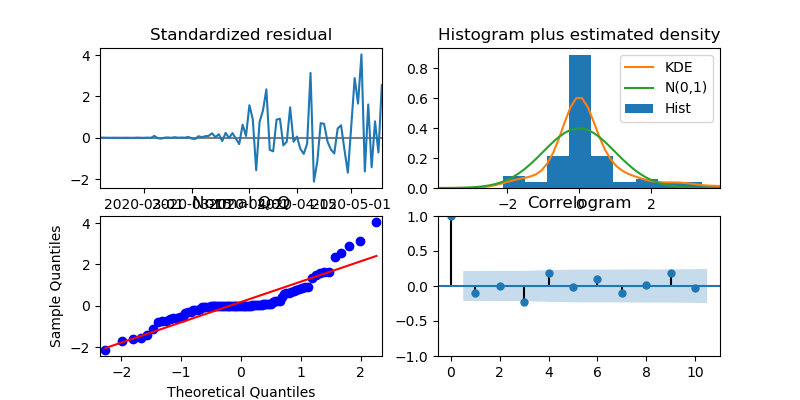

In [76]:
import matplotlib.pyplot as plt
results.plot_diagnostics(figsize=(8, 4))
plt.show()

In [77]:
active = pd.DataFrame(active)
active['2020':]



,Active
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-05-06,35871.0
2020-05-07,37686.0
2020-05-08,39823.0
2020-05-09,41406.0


In [78]:
deaths = pd.DataFrame(deaths)
deaths['2020':]

,Deaths
Date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-05-06,1785.0
2020-05-07,1889.0
2020-05-08,1985.0


<IPython.core.display.Javascript object>


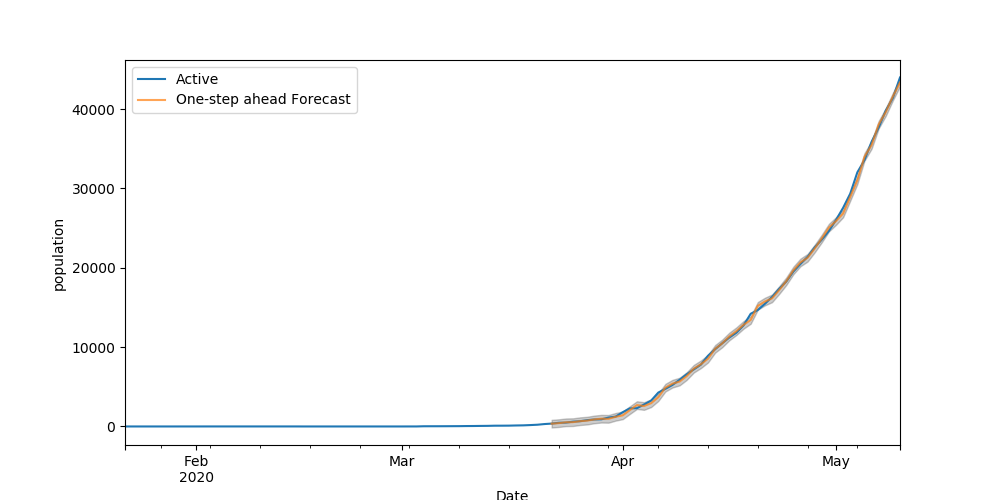

In [79]:
%matplotlib notebook

pred = results.get_prediction(start=pd.to_datetime('2020-03-22'), dynamic=False)
pred_ci = pred.conf_int()
ax = active['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('population')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


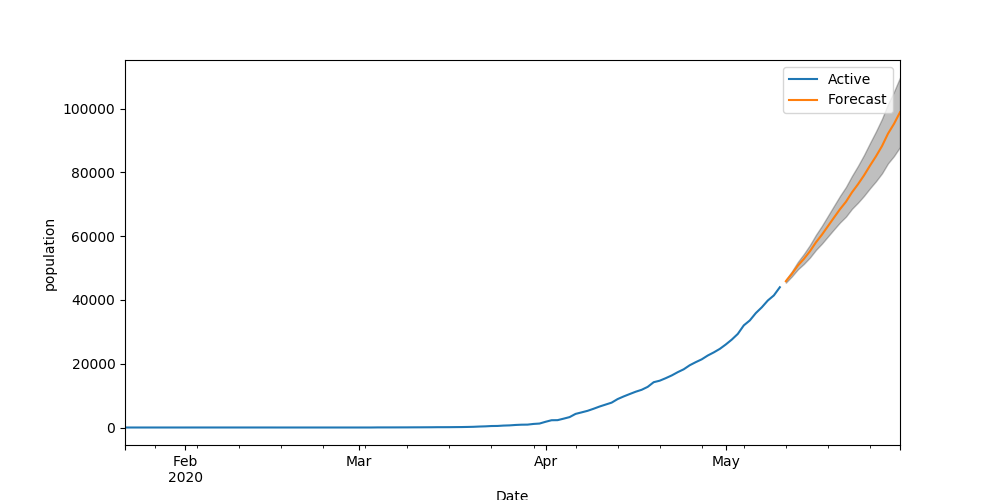

In [80]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = active['2020':].plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('population')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


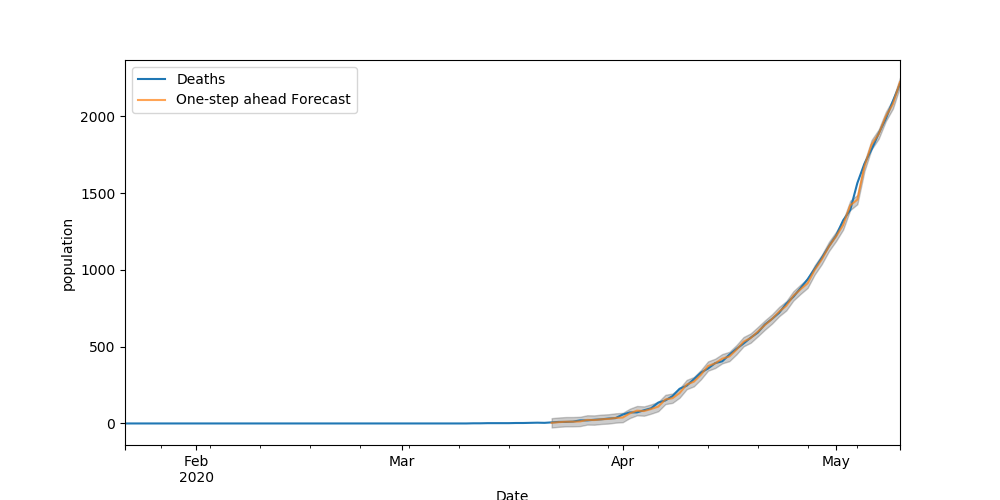

In [81]:
%matplotlib notebook
pred = results_d.get_prediction(start=pd.to_datetime('2020-03-22'), dynamic=False)
pred_ci = pred.conf_int()
ax = deaths['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('population')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


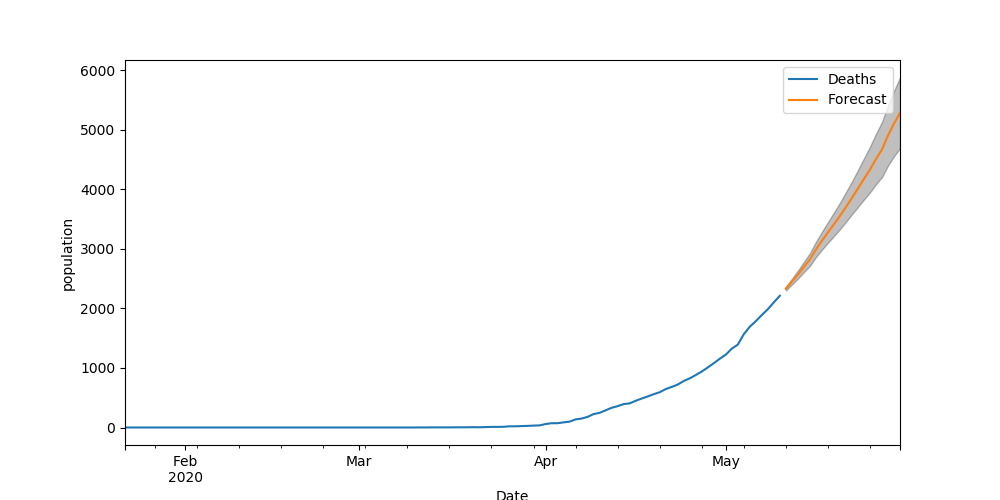

In [82]:
%matplotlib notebook
pred_uc_d = results_d.get_forecast(steps=20)
pred_ci_d = pred_uc_d.conf_int()
ax = deaths['2020':].plot(label='observed', figsize=(10, 5))
pred_uc_d.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_d.index,
                pred_ci_d.iloc[:, 0],
                pred_ci_d.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('population')
plt.legend()
plt.show()

In [83]:
print("Prediction for Active cases:")
pred_uc.predicted_mean

Prediction for Active cases:


2020-05-11    45870.298477
2020-05-12    48165.180392
2020-05-13    50764.087332
2020-05-14    52853.186136
2020-05-15    55229.968131
2020-05-16    58032.055801
2020-05-17    60444.094754
2020-05-18    63113.511545
2020-05-19    65781.133368
2020-05-20    68412.772215
2020-05-21    70764.365879
2020-05-22    73712.142307
2020-05-23    76244.820427
2020-05-24    79017.143091
2020-05-25    82085.994418
2020-05-26    85021.327291
2020-05-27    88223.806417
2020-05-28    92126.521180
2020-05-29    95205.261625
2020-05-30    98833.534398
Freq: D, dtype: float64

In [84]:
print("Prediction for No. of Deaths:")
pred_uc_d.predicted_mean

Prediction for No. of Deaths:


2020-05-11    2329.954267
2020-05-12    2448.378442
2020-05-13    2565.341306
2020-05-14    2695.149416
2020-05-15    2819.181060
2020-05-16    2987.679660
2020-05-17    3134.401795
2020-05-18    3273.356062
2020-05-19    3411.198561
2020-05-20    3550.622737
2020-05-21    3700.969535
2020-05-22    3854.385113
2020-05-23    4012.256527
2020-05-24    4172.378071
2020-05-25    4328.749448
2020-05-26    4507.121491
2020-05-27    4666.492573
2020-05-28    4901.865946
2020-05-29    5102.238358
2020-05-30    5281.109772
Freq: D, dtype: float64